In [2]:
# 각 데이터셋 호출
df_challenger = pd.read_csv("tft-match-data (1)\\TFT_Challenger_MatchData.csv")
df_grandmaster = pd.read_csv("tft-match-data (1)\\TFT_Grandmaster_MatchData.csv")
df_master = pd.read_csv("tft-match-data (1)\\TFT_Master_MatchData.csv")
df_diamond = pd.read_csv("tft-match-data (1)\\TFT_Diamond_MatchData.csv")
df_platinum = pd.read_csv("tft-match-data (1)\\TFT_Platinum_MatchData.csv")

In [3]:
# 각 데이터 셋에 티어 컬럼 추가
df_challenger["tier"] = 'ch'
df_grandmaster["tier"] = 'gm'
df_master["tier"] = 'ms'
df_diamond["tier"] = 'dia'
df_platinum["tier"] = 'pt'

In [4]:
# 각 데이터프레임을 하나의 데이터 프레임으로 합침
df_integrate = pd.concat([df_challenger, df_grandmaster, df_master, df_diamond, df_platinum], ignore_index = True)
df_integrate.tail(8)

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion,tier
399990,KR_4296831363,2049.954102,7,19,8,1016.631775,"{'Demolitionist': 1, 'MechPilot': 1}","{'Rumble': {'items': [6], 'star': 1}}",pt
399991,KR_4296831363,2049.954102,7,31,6,1701.195190,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '...","{'Graves': {'items': [36], 'star': 2}, 'Blitzc...",pt
399992,KR_4296831363,2049.954102,8,38,1,2041.694946,"{'Blaster': 1, 'Chrono': 6, 'DarkStar': 1, 'De...","{'TwistedFate': {'items': [], 'star': 2}, 'Cai...",pt
399993,KR_4296831363,2049.954102,7,34,4,1862.439209,"{'Chrono': 2, 'Cybernetic': 1, 'Protector': 2,...","{'TwistedFate': {'items': [58], 'star': 2}, 'X...",pt
399994,KR_4296831363,2049.954102,8,33,5,1799.791870,"{'Chrono': 2, 'Cybernetic': 1, 'Infiltrator': ...","{'Xayah': {'items': [5], 'star': 2}, 'Yasuo': ...",pt
399995,KR_4296831363,2049.954102,8,38,2,2041.694946,"{'Blaster': 1, 'DarkStar': 1, 'MechPilot': 1, ...","{'Poppy': {'items': [], 'star': 2}, 'Zoe': {'i...",pt
399996,KR_4296831363,2049.954102,8,35,3,1911.133057,"{'Blaster': 2, 'Chrono': 1, 'Demolitionist': 1...","{'Ziggs': {'items': [44, 48], 'star': 3}, 'Mal...",pt
399997,KR_4296831363,2049.954102,8,31,7,1700.155151,"{'Blaster': 3, 'Chrono': 5, 'Cybernetic': 2, '...","{'Caitlyn': {'items': [14], 'star': 3}, 'Leona...",pt


- 1게임에 8명의 플레이어가 존재
    - 데이터 컬럼수가 8의 배수가 되어야 하지만 누락된 데이터가 존재
- 중복 데이터 1개 삭제 및 데이터가 누락된 데이터 확인
- member 값 : 16 = 중복 데이터, member값 : 7 = 1명의 플레이어 데이터 누락

In [5]:
# 중복 데이터 및 데이터 누락 확인 함수
def check_data(df, gameId):
    check_df = df.groupby(gameId).size().reset_index(name = "member")
    return check_df[check_df["member"] != 8]

In [6]:
check_df = check_data(df_integrate, "gameId")
check_df

,gameId,member
2432,KR_4263820118,16
10243,KR_4313697214,16
12053,KR_4318806255,7
12525,KR_4320079059,16
20067,KR_4335870255,7
25323,KR_4344513862,16
27702,KR_4347884427,16
34207,KR_4357966612,16
34976,KR_4358922415,16
37414,KR_4361594426,16


In [7]:
# 데이터가 누락된 행 drop
missing_player = list(check_df[check_df["member"] == 7]["gameId"].values)

for x in missing_player:
    idx = list(df_integrate[df_integrate["gameId"] == x].index)
    df_integrate = df_integrate.drop(idx)

check_df = check_data(df_integrate, "gameId")
check_df

,gameId,member
2432,KR_4263820118,16
10243,KR_4313697214,16
12524,KR_4320079059,16
25321,KR_4344513862,16
27700,KR_4347884427,16
34205,KR_4357966612,16
34974,KR_4358922415,16
37412,KR_4361594426,16
37571,KR_4361773461,16
38718,KR_4362846604,16


In [8]:
# 인게임 데이터 값이 누락된 경우 Ranked가 0, combination, champion 데이터 모두 누락되어 있음
df_integrate[df_integrate["Ranked"] == 0].head()

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion,tier
100911,KR_4336328756,125.278297,3,4,0,125.278297,{},{},gm
100912,KR_4336328756,125.278297,3,4,0,125.278297,{},{},gm
100913,KR_4336328756,125.278297,3,4,0,125.278297,{},{},gm
100914,KR_4336328756,125.278297,3,4,0,125.278297,{},{},gm
100915,KR_4336328756,125.278297,3,4,0,125.278297,{},{},gm


In [9]:
# 게임 데이터 중 Rank가 0이 하나라도 있는 경우 분석에 의미가 없는 값이 되므로 해당 gameID의 모든 행 삭제
# 누락된 행 삭제
wrong_data = df_integrate[df_integrate["Ranked"] == 0]["gameId"].unique()
for x in wrong_data:
    idx = list(df_integrate[df_integrate["gameId"] == x].index)
    df_integrate = df_integrate.drop(idx)

df_integrate[df_integrate["Ranked"] == 0]

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion,tier


In [10]:
# tier를 제외한 나머지 값이 중복된 행 삭제
df_list = list(df_integrate)[:-1]
df_integrate = df_integrate.drop_duplicates(df_list, ignore_index = True)
check_df = check_data(df_integrate, "gameId")
check_df

,gameId,member


In [11]:
df_integrate

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion,tier
0,KR_4247538593,2142.470703,8,35,1,2134.272217,"{'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'S...","{'JarvanIV': {'items': [27], 'star': 3}, 'Sona...",ch
1,KR_4247538593,2142.470703,9,35,2,2134.272217,"{'Blaster': 2, 'Mercenary': 1, 'Rebel': 6, 'Se...","{'Malphite': {'items': [7], 'star': 2}, 'Yasuo...",ch
2,KR_4247538593,2142.470703,8,34,3,2073.459229,"{'Cybernetic': 1, 'DarkStar': 3, 'Demolitionis...","{'KaiSa': {'items': [99, 2, 23], 'star': 2}, '...",ch
3,KR_4247538593,2142.470703,8,33,4,1998.146729,"{'Blaster': 1, 'Cybernetic': 1, 'DarkStar': 1,...","{'KaiSa': {'items': [44, 37], 'star': 2}, 'Ann...",ch
4,KR_4247538593,2142.470703,9,33,5,1986.443237,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'...","{'Ziggs': {'items': [], 'star': 1}, 'Yasuo': {...",ch
...,...,...,...,...,...,...,...,...,...
399715,KR_4296831363,2049.954102,7,34,4,1862.439209,"{'Chrono': 2, 'Cybernetic': 1, 'Protector': 2,...","{'TwistedFate': {'items': [58], 'star': 2}, 'X...",pt
399716,KR_4296831363,2049.954102,8,33,5,1799.791870,"{'Chrono': 2, 'Cybernetic': 1, 'Infiltrator': ...","{'Xayah': {'items': [5], 'star': 2}, 'Yasuo': ...",pt
399717,KR_4296831363,2049.954102,8,38,2,2041.694946,"{'Blaster': 1, 'DarkStar': 1, 'MechPilot': 1, ...","{'Poppy': {'items': [], 'star': 2}, 'Zoe': {'i...",pt
399718,KR_4296831363,2049.954102,8,35,3,1911.133057,"{'Blaster': 2, 'Chrono': 1, 'Demolitionist': 1...","{'Ziggs': {'items': [44, 48], 'star': 3}, 'Mal...",pt


In [12]:
test_df = df_integrate.head(80000)

In [13]:
test_df

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion,tier
0,KR_4247538593,2142.470703,8,35,1,2134.272217,"{'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'S...","{'JarvanIV': {'items': [27], 'star': 3}, 'Sona...",ch
1,KR_4247538593,2142.470703,9,35,2,2134.272217,"{'Blaster': 2, 'Mercenary': 1, 'Rebel': 6, 'Se...","{'Malphite': {'items': [7], 'star': 2}, 'Yasuo...",ch
2,KR_4247538593,2142.470703,8,34,3,2073.459229,"{'Cybernetic': 1, 'DarkStar': 3, 'Demolitionis...","{'KaiSa': {'items': [99, 2, 23], 'star': 2}, '...",ch
3,KR_4247538593,2142.470703,8,33,4,1998.146729,"{'Blaster': 1, 'Cybernetic': 1, 'DarkStar': 1,...","{'KaiSa': {'items': [44, 37], 'star': 2}, 'Ann...",ch
4,KR_4247538593,2142.470703,9,33,5,1986.443237,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'...","{'Ziggs': {'items': [], 'star': 1}, 'Yasuo': {...",ch
...,...,...,...,...,...,...,...,...,...
79995,KR_4254769102,2319.661377,7,33,4,1996.358643,"{'DarkStar': 2, 'Demolitionist': 1, 'Infiltrat...","{'KhaZix': {'items': [], 'star': 2}, 'KaiSa': ...",gm
79996,KR_4254769102,2319.661377,8,31,5,1871.789551,"{'Chrono': 1, 'Cybernetic': 1, 'DarkStar': 3, ...","{'Leona': {'items': [], 'star': 1}, 'Mordekais...",gm
79997,KR_4254769102,2319.661377,9,30,6,1804.010986,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'...","{'Malphite': {'items': [], 'star': 2}, 'Yasuo'...",gm
79998,KR_4254769102,2319.661377,7,28,7,1707.270996,"{'Cybernetic': 1, 'DarkStar': 2, 'Demolitionis...","{'KaiSa': {'items': [38], 'star': 2}, 'Annie':...",gm


In [14]:
from ast import literal_eval
# dictionary 변수에 string 변수를 literal_eval을 이용하여 dict형으로 변환 후 할당
combination = test_df["combination"].values[0]
champion = test_df["champion"].values[0]

combination = literal_eval(combination)
champion = literal_eval(champion)

In [15]:
# 직업 추가해주는 아이템 리스트
# 해당 아이템을 가지고 있는 행(index) 찾는 반복문
work_items = [18, 28, 58, 68, 38, 48, 78, 88, 89]

user_item = []
find2_idx = []
all_item_ls = []
for y in range(300):
    champion = literal_eval(test_df["champion"].values[y])
    a = list(champion.values())
    champions_item = []
    for x in range(len(a)):
        champions_item.append(a[x]["items"])

    # champions_item = [data2 for data1 in champions_item for data2 in data1]    
    all_item_ls.append(champions_item)
    for x in work_items :
        if x in champions_item:
            find2_idx.append(y)
            break

In [16]:
champion = literal_eval(test_df["champion"].values[0])
a = list(champion.values())
champions_item = []
for x in range(len(a)):
    champions_item.append(a[x]["items"])

# champions_item = [data2 for data1 in champions_item for data2 in data1]  
champions_item

[[27], [46], [37, 69], [69, 25, 25], [], [], [], [59]]

In [17]:
# 조합에 TemplateTrait가 있는 경우 찾음
# 행 및 조합 찾음
find_template_trait = []
find_idx = []
for x in range(80000):
    ttt = test_df["combination"].values[x]
    if "TemplateTrait" in ttt:
        find_idx.append(x)
        find_template_trait.append(literal_eval(ttt))

In [18]:
# 챔피언 정보 csv 파일
champion_df = pd.read_csv("TFT_Champion_CurrentVersion.csv")

In [19]:
# type_df = 계열 시너지
type_data = {
            "1st" : [3, 3, 3, 2, 3, 3, 2, 3, 2, 2],
            "2nd" : [np.nan, np.nan, 6, np.nan, 6, 6, 4, 6, 4, 4],
            "3rd" : [np.nan, np.nan, 9, np.nan, np.nan, np.nan, 6, 9, np.nan, 6]}

type_df = pd.DataFrame(type_data, columns = ["1st", "2nd", "3rd"],
                      index = ["Set3_Void", "MechPilot", "Rebel", " Valkyrie", " StarGuardian", "Cybernetic", "Chrono",\
                "DarkStar", "SpacePirate", "Set3_Celestial"])
# type_df = type_df.astype({"2nd":"Int64", "3rd":"Int64"})
type_df

,1st,2nd,3rd
Set3_Void,3,NaN,NaN
MechPilot,3,NaN,NaN
Rebel,3,6.0,9.0
Valkyrie,2,NaN,NaN
StarGuardian,3,6.0,NaN
Cybernetic,3,6.0,NaN
Chrono,2,4.0,6.0
DarkStar,3,6.0,9.0
SpacePirate,2,4.0,NaN
Set3_Celestial,2,4.0,6.0


In [20]:
# work_df = 직업 시너지
work_data = { "1st" : [3, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2],
             "2nd" : [6, np.nan, 4, 4, 4, 4, 4, np.nan, np.nan, 4, np.nan, 4, np.nan],
             "3rd" : [9, np.nan, 6, np.nan, 6, np.nan, np.nan, np.nan, np.nan, 6, np.nan, np.nan, np.nan],
             "4th" : [np.nan, np.nan, 8, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, \
                  np.nan, np.nan, np.nan]}
work_df = pd.DataFrame(work_data, columns = ["1st", "2nd", "3rd", "4th"],
                      index = ["Set3_Bladmaster", "ManaReaver", "Set3_Sorcerer", "Vanguard", "Protector", "Set3_Mystic"\
                  , "Set3_Brawler", "Mercenary", " Starship", "Infiltrator", "Sniper", "Blaster", "Demolitionist"])
# work_df = work_df.astype({"2nd":"Int64", "3rd":"Int64", "4th":"Int64"})
work_df

,1st,2nd,3rd,4th
Set3_Bladmaster,3,6.0,9.0,NaN
ManaReaver,2,NaN,NaN,NaN
Set3_Sorcerer,2,4.0,6.0,8.0
Vanguard,2,4.0,NaN,NaN
Protector,2,4.0,6.0,NaN
Set3_Mystic,2,4.0,NaN,NaN
Set3_Brawler,2,4.0,NaN,NaN
Mercenary,1,NaN,NaN,NaN
Starship,1,NaN,NaN,NaN
Infiltrator,2,4.0,6.0,NaN


In [22]:
list(type_df.index)

['Set3_Void',
 'MechPilot',
 'Rebel',
 ' Valkyrie',
 ' StarGuardian',
 'Cybernetic',
 'Chrono',
 'DarkStar',
 'SpacePirate',
 'Set3_Celestial']

In [50]:
synerge_ls = list(type_df.index) + list(work_df.index)
count_synerge = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,\
                 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,\
                0, 0, 0]

count_synerge = { name:value for name, value in zip(synerge_ls, count_synerge) }
count_synerge
# synerge_ls

{'Set3_Void': 0,
 'MechPilot': 0,
 'Rebel': 0,
 ' Valkyrie': 0,
 ' StarGuardian': 0,
 'Cybernetic': 0,
 'Chrono': 0,
 'DarkStar': 0,
 'SpacePirate': 0,
 'Set3_Celestial': 0,
 'Set3_Bladmaster': 0,
 'ManaReaver': 0,
 'Set3_Sorcerer': 0,
 'Vanguard': 0,
 'Protector': 0,
 'Set3_Mystic': 0,
 'Set3_Brawler': 0,
 'Mercenary': 0,
 ' Starship': 0,
 'Infiltrator': 0,
 'Sniper': 0,
 'Blaster': 0,
 'Demolitionist': 0}

In [39]:
count_synerge["Rebel"] += 1
count_synerge["Rebel"]

1

In [24]:
combination = literal_eval(test_df["combination"].values[0])
combination["DarkStar"]

2

In [25]:
combination["DarkStar"]

2

In [26]:
list(type_df.loc["DarkStar"][0:])

[3.0, 6.0, 9.0]

In [27]:
# 시너지 파악
def synerge_count(synerge_df, synerge_name) :
    synerge_counts = 0
    
    for data in list(synerge_df.loc[synerge_name][0:]):
        if np.isnan(data):
            return synerge_counts
        synerge_counts += 1
    return synerge_counts

In [236]:
synerge_count(type_df, "Set3_Void")

1

In [240]:
synerge_count(work_df, "Set3_Sorcerer")

4

In [ ]:
type_df.loc[synerge][0:]

In [271]:
type_df.loc["DarkStar"][0:3]

1st    3.0
2nd    6.0
3rd    9.0
Name: DarkStar, dtype: float64

In [51]:
for x in range(400):
    combination = literal_eval(test_df["combination"].values[x])
    combination_ls = list(combination.keys())
    # count_synerge = {""}

    for synerge in combination_ls:
        if synerge in list(type_df.index) :
            # print(synerge)
            synerge_cnt = synerge_count(type_df, synerge)

            # 추후 시너지별 인원수에 따른 차이까지 확인할때 변경 필요
            #for x in range(len(list(type_df.loc[synerge][0:synerge_cnt]))):
            # 우선 기본적으로 시너지가 존재하는지 안하는지만 파악
            # 1st의 값보다 combination의 시너지 값이 크면 시너지가 존재
            if combination[synerge] >= type_df.loc[synerge][0]:
#                 synerge_effact = 0
#                 print(combination[synerge])
#                 print(type_df.loc[synerge][0])
                count_synerge[synerge] += 1
        elif synerge in list(work_df.index) :
            synerge_cnt = synerge_count(work_df, synerge)
            if combination[synerge] >= work_df.loc[synerge][0]:
                count_synerge[synerge] += 1
count_synerge

{'Set3_Void': 0,
 'MechPilot': 71,
 'Rebel': 114,
 ' Valkyrie': 0,
 ' StarGuardian': 0,
 'Cybernetic': 50,
 'Chrono': 94,
 'DarkStar': 106,
 'SpacePirate': 19,
 'Set3_Celestial': 113,
 'Set3_Bladmaster': 0,
 'ManaReaver': 23,
 'Set3_Sorcerer': 65,
 'Vanguard': 84,
 'Protector': 38,
 'Set3_Mystic': 148,
 'Set3_Brawler': 65,
 'Mercenary': 195,
 ' Starship': 0,
 'Infiltrator': 84,
 'Sniper': 71,
 'Blaster': 163,
 'Demolitionist': 111}

In [23]:
combination

{'DarkStar': 2,
 'Protector': 4,
 'Rebel': 1,
 'Set3_Celestial': 3,
 'Set3_Mystic': 4,
 'StarGuardian': 2,
 'TemplateTrait': 1}

In [24]:
champion

{'JarvanIV': {'items': [27], 'star': 3},
 'Sona': {'items': [46], 'star': 3},
 'Rakan': {'items': [37, 69], 'star': 3},
 'XinZhao': {'items': [69, 25, 25], 'star': 3},
 'Neeko': {'items': [], 'star': 2},
 'Karma': {'items': [], 'star': 2},
 'Soraka': {'items': [], 'star': 2},
 'Lulu': {'items': [59], 'star': 1}}

In [51]:
test_df.loc[find_idx]

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion,tier
0,KR_4247538593,2142.470703,8,35,1,2134.272217,"{'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'S...","{'JarvanIV': {'items': [27], 'star': 3}, 'Sona...",ch
3,KR_4247538593,2142.470703,8,33,4,1998.146729,"{'Blaster': 1, 'Cybernetic': 1, 'DarkStar': 1,...","{'KaiSa': {'items': [44, 37], 'star': 2}, 'Ann...",ch
7,KR_4247538593,2142.470703,8,28,8,1694.417358,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc...",ch
9,KR_4247595409,2386.106201,9,41,2,2377.768066,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '...","{'Malphite': {'items': [], 'star': 1}, 'Blitzc...",ch
11,KR_4247595409,2386.106201,6,31,4,1860.638428,"{'DarkStar': 2, 'Infiltrator': 1, 'Protector':...","{'JarvanIV': {'items': [27, 9], 'star': 3}, 'S...",ch
...,...,...,...,...,...,...,...,...,...
79951,KR_4357234323,2064.383301,7,26,8,1456.373535,"{'DarkStar': 2, 'Demolitionist': 1, 'Infiltrat...","{'KhaZix': {'items': [], 'star': 3}, 'KaiSa': ...",ch
79952,KR_4357235941,2054.261475,8,38,1,2046.055176,"{'Blaster': 0, 'Chrono': 2, 'Demolitionist': 2...","{'KaiSa': {'items': [], 'star': 2}, 'Jayce': {...",ch
79974,KR_4357242649,2180.889648,7,28,7,1631.433716,"{'Chrono': 1, 'Cybernetic': 1, 'Set3_Sorcerer'...","{'TwistedFate': {'items': [37, 14], 'star': 3}...",ch
79981,KR_4357244865,2096.125244,7,34,6,1895.789673,"{'Protector': 1, 'Set3_Mystic': 1, 'Set3_Sorce...","{'Poppy': {'items': [27, 5], 'star': 2}, 'Zoe'...",ch


In [321]:
pd.DataFrame(find_template_trait)

,DarkStar,Protector,Rebel,Set3_Celestial,Set3_Mystic,StarGuardian,TemplateTrait,Blaster,Cybernetic,Demolitionist,...,SpacePirate,Valkyrie,Chrono,Set3_Brawler,Set3_Void,Starship,ManaReaver,Sniper,Vanguard,Set3_Blademaster
0,2.0,4.0,1.0,3.0,4.0,2.0,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,2.0,...,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2.0,NaN,NaN,NaN,1,4.0,2.0,NaN,...,NaN,1.0,2.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,3.0,NaN,NaN,NaN,1,4.0,2.0,2.0,...,NaN,1.0,2.0,4.0,1.0,1.0,NaN,NaN,NaN,NaN
4,2.0,4.0,1.0,2.0,3.0,2.0,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,NaN,NaN,2.0,NaN,NaN,NaN,1,1.0,NaN,NaN,...,NaN,2.0,4.0,NaN,NaN,NaN,1.0,NaN,1.0,4.0
1319,3.0,NaN,NaN,NaN,NaN,NaN,1,NaN,1.0,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1320,2.0,1.0,NaN,NaN,2.0,6.0,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1321,NaN,NaN,6.0,2.0,2.0,NaN,1,2.0,NaN,2.0,...,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,2.0


In [223]:
pd.DataFrame(all_item_ls)

,0,1,2,3,4,5,6,7,8,9
0,[27],[46],"[37, 69]","[69, 25, 25]",[],[],[],[59],None,None
1,[7],"[99, 22, 23]",[],[],[],[],"[26, 49, 49]","[99, 26, 12]","[37, 66]",None
2,"[99, 2, 23]",[37],"[16, 19, 55]","[36, 45]",[],[],[],[17],None,None
3,"[44, 37]",[],"[15, 16, 14]",[],"[99, 46, 55]",[],"[37, 36]",[],None,None
4,[],[],[],[5],[],"[12, 79]","[49, 33, 15]","[46, 36, 44]",[],None
...,...,...,...,...,...,...,...,...,...,...
295,[],[],[],[],"[33, 15, 36]",[],[12],"[37, 44]",None,None
296,[67],[67],[57],"[99, 69, 11]","[28, 19]",[],[],"[13, 2]",None,None
297,[8],[6],[57],[3],"[49, 25]",[],"[56, 79, 44]","[99, 23, 69]",[],None
298,"[44, 34, 57]",[],"[16, 19, 35]",[28],[],[],[],"[69, 15]",None,None


In [338]:
unfind_idx = list(set(list(range(80000))) - set(find_idx))

In [339]:
X_1 = test_df.loc[unfind_idx]["Ranked"]
# X_1

In [340]:
t1 = pd.DataFrame(test_df["Ranked"])

In [341]:
t1["template"] = 0

In [342]:
t1.loc[find_idx, "template"] = 1

In [343]:
t1[t1["template"] == 1]["Ranked"]

0        1
3        4
7        8
9        2
11       4
        ..
79951    8
79952    1
79974    7
79981    6
79984    1
Name: Ranked, Length: 14537, dtype: int64

In [365]:
t2 = t1[t1["template"] == 1].groupby("Ranked").size()
t3 = t1[t1["template"] == 0].groupby("Ranked").size()

In [366]:
t2

Ranked
1    2149
2    2209
3    2022
4    1928
5    1771
6    1654
7    1535
8    1269
dtype: int64

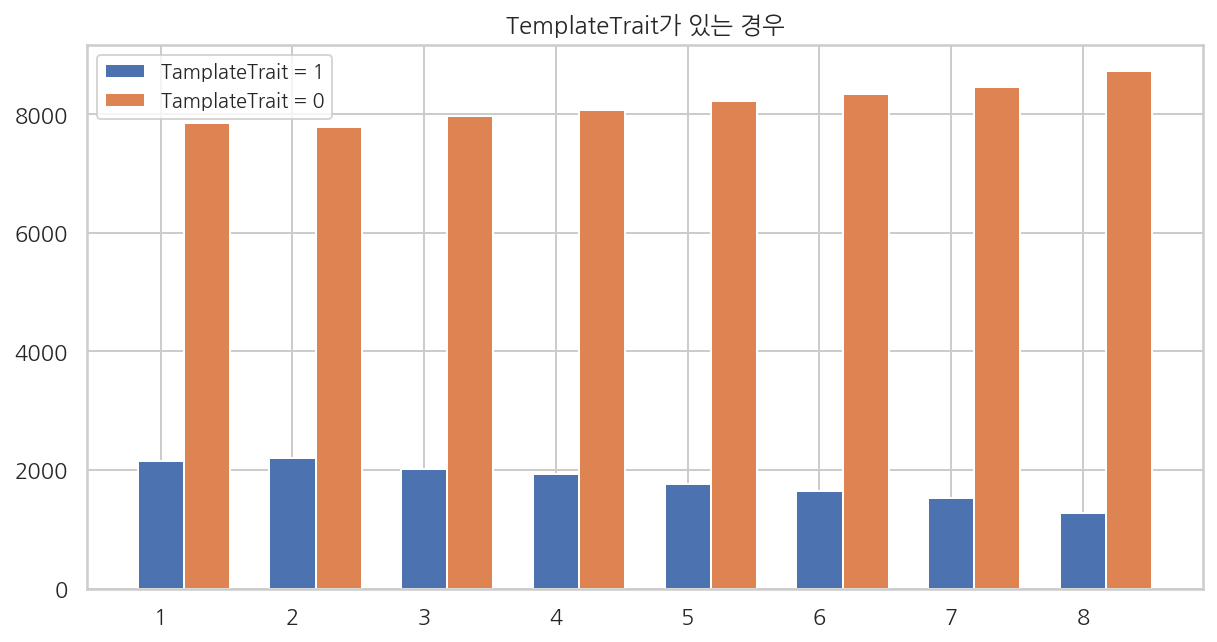

In [367]:
bar_width = 0.35

plt.figure(figsize = (10, 5), facecolor="1.")
p1 = plt.bar(t2.index, t2.values, bar_width)
p2 = plt.bar(t3.index + bar_width, t3.values, bar_width)
plt.title("TemplateTrait가 있는 경우")
plt.legend((p1, p2), ('TamplateTrait = 1', 'TamplateTrait = 0'), fontsize=10)

plt.show()

In [ ]:
t1.loc[find_idx]["Ranked"]

In [348]:
y_0 = t1.loc[find_idx]["Ranked"]
X_0 = t1.loc[find_idx]["template"]
y_1 = t1.loc[unfind_idx]["Ranked"]
X_1 = t1.loc[unfind_idx]["template"]

In [76]:
%matplotlib inline

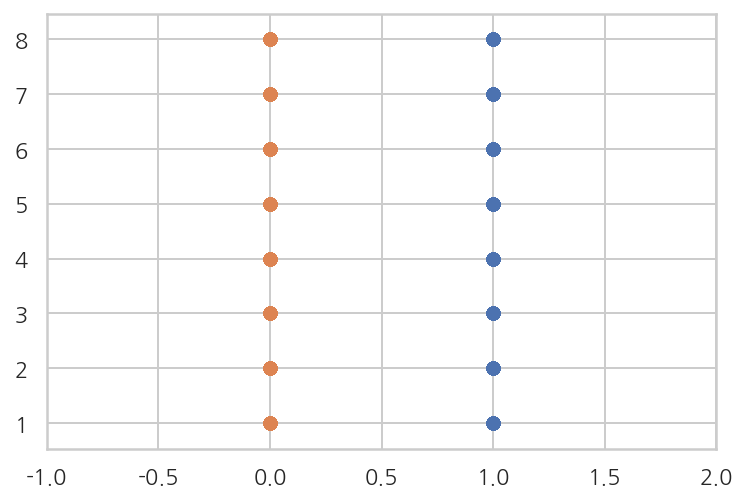

In [350]:
plt.figure(facecolor="1.")
scatter1 = plt.scatter(X_0, y_0)
scatter2 = plt.scatter(X_1, y_1)
plt.xlim(-1, 2)
plt.show()

In [352]:
# 80000개의 데이터(10000개의 게임데이터에서 상관관계 분석)
t1.corr()

,Ranked,template
Ranked,1.000000,-0.076334
template,-0.076334,1.000000


##### combination에서 template trait가 있어도 없어도 Ranked에 큰 영향을 끼치지 않는가 ??
- combination에서 다른 조합 시너지들도 비교해볼 필요가 있음

In [68]:
# 조합에 DarkStar가 있는 경우 찾음
# 행 및 조합 찾음
find_DarkStar = []
find_idx2 = []
for x in range(80000):
    ttt = test_df["combination"].values[x]
    if "DarkStar" in ttt:
        find_idx2.append(x)
        find_DarkStar.append(literal_eval(ttt))

In [69]:
darkstar_test = pd.DataFrame(test_df["Ranked"])

In [70]:
darkstar_test["DarkStar"] = 0

In [72]:
darkstar_test.loc[find_idx2, "DarkStar"] = 1

In [73]:
darkstar_test[darkstar_test["DarkStar"] == 1]["Ranked"]

0        1
2        3
3        4
10       3
11       4
        ..
79987    4
79994    3
79995    4
79996    5
79998    7
Name: Ranked, Length: 36831, dtype: int64